In [137]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
%matplotlib inline

In [138]:
l = pd.read_csv("learning_loss.csv",header=1)
df = pd.read_csv("game_history.csv",header=5)

In [139]:
with open('learning_loss.csv') as f:
    for i in range(1):
        print(f.readline(),end='')

print("Loss history len:",len(l))
print("")
with open('game_history.csv') as f:
    for i in range(5):
        print(f.readline(),end='')

print("Game history len:",len(df))
print("Full games: ",df['game_over'].sum())


RL Brain - Loss file -  2018/12/31 11:57:57
Loss history len: 1

Arcade RL experiment - History file - 2018/12/31 11:57:56
learning_rate : 0.000010
epsilon : Adapt
max_memory : 5000
batch_size : 512
Game history len: 1
Full games:  1.0


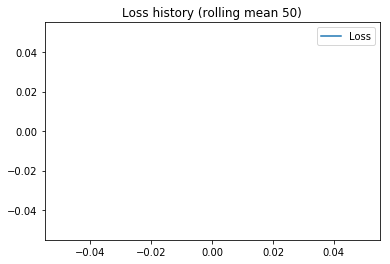

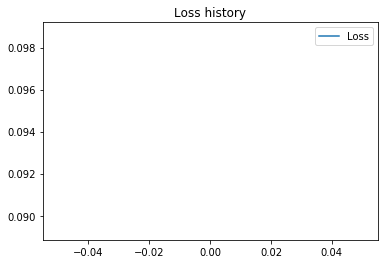

In [140]:
l.rolling(50).mean().plot(title="Loss history (rolling mean 50)")
l.plot(title="Loss history")


In [141]:
print("Final loss decay:\n",(1 - (l.max()  - l.tail(50).mean())/l.max()))

Final loss decay:
 Loss    1.0
dtype: float64


In [142]:
df.head()

,timer,s0_player_x,s0_player_y,s0_coins,s0_coin_0_x,s0_coin_0_y,s0_balls,action,s1_player_x,s1_player_y,s1_coins,s1_coin_0_x,s1_coin_0_y,s1_balls,game_over,reward
0,1.0,0.406667,0.443333,1.0,0.5,0.5,0.0,1.0,0.406667,0.476667,0.0,0.0,0.0,0.0,1.0,0.9995


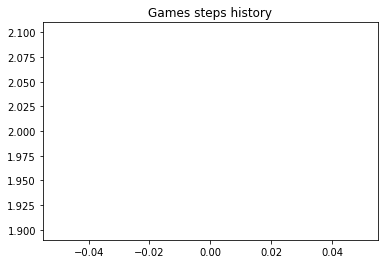

In [143]:
l_games = [-1]
l_games.extend(list(df[df['game_over']>0].index))
plt.plot([(l_games[p+1]-l_games[p]+1) for p in range(len(l_games)-1)])
plt.title("Games steps history")
plt.show()

C:\Users\emamorc\AppData\Local\conda\conda\envs\arcade\lib\site-packages\pandas\core\series.py:851: FutureWarning: 
Passing list-likes to .loc or [] with any missing label will raise
KeyError in the future, you can use .reindex() as an alternative.

See the documentation here:
https://pandas.pydata.org/pandas-docs/stable/indexing.html#deprecate-loc-reindex-listlike
  return self.loc[key]


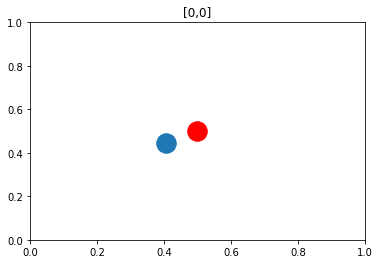

In [144]:
p=0

loc0,loc1 = l_games[p]+1,l_games[p+1]
my_title = "["+str(loc0)+","+str(loc1)+"]"
plt.scatter(np.array([df.loc[loc0:loc1]['s0_player_x']]),np.array([df.loc[loc0:loc1]['s0_player_y']]),s=380)
xnames = ['s0_coin_{:d}_x'.format(i) for i in range(20)]
ynames = ['s0_coin_{:d}_y'.format(i) for i in range(20)]
plt.scatter(df.loc[loc0][xnames].values,df.loc[loc0][ynames].values,marker='o',color='r',s=380)
plt.title(my_title)
plt.xlim(0,1)
plt.ylim(0,1)
plt.show()

In [145]:

for p in range(len(l_games)-1):
    loc0,loc1 = l_games[p]+1,l_games[p+1]
    if(loc1>loc0):
        my_title = "["+str(loc0)+","+str(loc1)+"]"
        plt.scatter(np.array([df.loc[loc0:loc1]['s0_player_x']]),
        np.array([df.loc[loc0:loc1]['s0_player_y']]))
        plt.scatter(np.array([df.loc[loc1]['s1_player_x'],]),np.array([df.loc[loc1]['s1_player_y']]),s=100,color='g')
        xnames = ['s0_coin_{:d}_x'.format(i) for i in range(20)]
        ynames = ['s0_coin_{:d}_y'.format(i) for i in range(20)]
        plt.scatter(df.loc[loc0][xnames].values,df.loc[loc0][ynames].values,marker='o',color='r',s=380)
        plt.title(my_title)
        plt.xlim(0,1)
        plt.ylim(0,1)
        plt.show()


In [146]:
df.head()

,timer,s0_player_x,s0_player_y,s0_coins,s0_coin_0_x,s0_coin_0_y,s0_balls,action,s1_player_x,s1_player_y,s1_coins,s1_coin_0_x,s1_coin_0_y,s1_balls,game_over,reward
0,1.0,0.406667,0.443333,1.0,0.5,0.5,0.0,1.0,0.406667,0.476667,0.0,0.0,0.0,0.0,1.0,0.9995


In [147]:
df[df['game_over']>0]

,timer,s0_player_x,s0_player_y,s0_coins,s0_coin_0_x,s0_coin_0_y,s0_balls,action,s1_player_x,s1_player_y,s1_coins,s1_coin_0_x,s1_coin_0_y,s1_balls,game_over,reward
0,1.0,0.406667,0.443333,1.0,0.5,0.5,0.0,1.0,0.406667,0.476667,0.0,0.0,0.0,0.0,1.0,0.9995


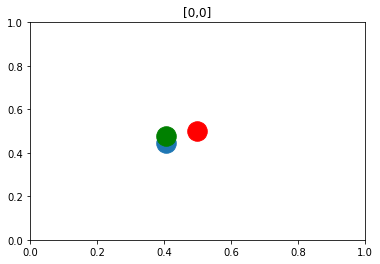

In [148]:
p=0

loc0,loc1 = l_games[p]+1,l_games[p+1]
my_title = "["+str(loc0)+","+str(loc1)+"]"
plt.scatter(np.array([df.loc[loc1]['s0_player_x'],]),np.array([df.loc[loc1]['s0_player_y']]),s=380)
plt.scatter(np.array([df.loc[loc1]['s1_player_x'],]),np.array([df.loc[loc1]['s1_player_y']]),s=380,color='g')
xnames = ['s0_coin_{:d}_x'.format(i) for i in range(20)]
ynames = ['s0_coin_{:d}_y'.format(i) for i in range(20)]
plt.scatter(df.loc[loc0][xnames].values,df.loc[loc0][ynames].values,marker='o',color='r',s=380)
plt.title(my_title)
plt.xlim(0,1)
plt.ylim(0,1)
plt.show()

In [149]:
from tensorflow.keras.layers import Input, Dense, Dropout
from tensorflow.keras.models import Model
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.models import load_model


In [150]:
model = load_model("model.h5")

In [151]:
MOVEMENT_SPEED = 0.05
def pick_dql_action(status_0):
    q_values = model.predict(np.matrix(status_0))
    action = np.argmax(q_values[0])
    action_encoder = { 0 : (0,0),\
                       1 : (0,1),\
                       2 : (1,1),\
                       3 : (1,0),\
                       4 : (1,-1),\
                       5 : (0,-1),\
                       6 : (-1,-1),\
                       7 : (-1,0),\
                       8:  (-1,1) }
    enc_action = action_encoder[action]
    change_x = MOVEMENT_SPEED * enc_action[0]
    change_y = MOVEMENT_SPEED * enc_action[1]
    return change_x,change_y


In [152]:
df.columns[1:7]

Index(['s0_player_x', 's0_player_y', 's0_coins', 's0_coin_0_x', 's0_coin_0_y',
       's0_balls'],
      dtype='object')

In [153]:
status = df.loc[loc1][df.columns[1:7]].values

In [154]:
status

array([0.40666667, 0.44333333, 1.        , 0.5       , 0.5       ,
       0.        ])

In [155]:
np.argmax(model.predict(np.matrix(status)))

7

In [156]:
np.argmax(model.predict(np.matrix(status))[0])

7

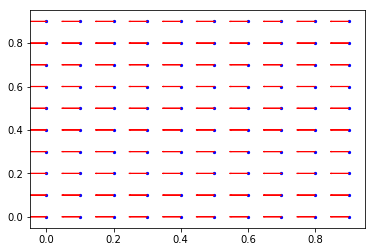

In [157]:
x_p = [p/400 for p in range(0,400,40)]
y_p = [p/400 for p in range(0,400,40)]

q = []

for x in x_p:
    for y in y_p:
        plt.scatter(x,y,s=5,color='b')
        status = np.array([x,y,1,0.5,0.5,0])
        q.append(model.predict(np.matrix(status))[0])
        dx,dy = pick_dql_action(status)
        plt.arrow(x,y,dx,dy,color='r')

plt.show()


In [158]:
import pandas as pd
import seaborn as sns

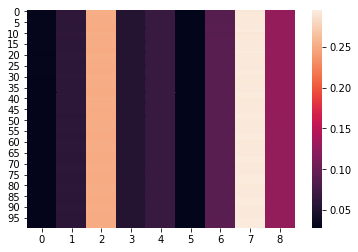

In [159]:
sns.heatmap(pd.DataFrame(q))

In [161]:
model.summary()


_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_1 (InputLayer)         (None, 6)                 0         
_________________________________________________________________
dense (Dense)                (None, 128)               896       
_________________________________________________________________
dropout (Dropout)            (None, 128)               0         
_________________________________________________________________
dense_1 (Dense)              (None, 32)                4128      
_________________________________________________________________
dropout_1 (Dropout)          (None, 32)                0         
_________________________________________________________________
dense_2 (Dense)              (None, 9)                 297       
Total params: 5,321
Trainable params: 5,321
Non-trainable params: 0
_________________________________________________________________


In [166]:
learning_rate = 0.0001

In [244]:
states = Input(shape=(2,),name='in') # Number of neurons to encode the state (status_size rows, 1 column)
 
x = Dense(units=128, activation='sigmoid',name='h1')(states)
y = Dense(units=32, activation='sigmoid',name='h2')(x)
q_values = Dense(units = 9, activation='softmax',name='out')(y)

model = Model(inputs = states, outputs = q_values, name='brain')
model.compile(loss = 'mse',optimizer= Adam(lr=learning_rate))



In [245]:
model.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
in (InputLayer)              (None, 2)                 0         
_________________________________________________________________
h1 (Dense)                   (None, 128)               384       
_________________________________________________________________
h2 (Dense)                   (None, 32)                4128      
_________________________________________________________________
out (Dense)                  (None, 9)                 297       
Total params: 4,809
Trainable params: 4,809
Non-trainable params: 0
_________________________________________________________________


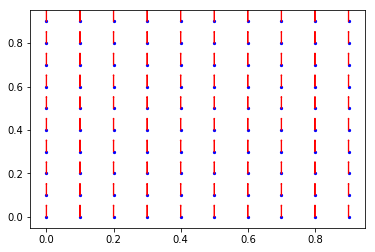

In [246]:
x_p = [p/400 for p in range(0,400,40)]
y_p = [p/400 for p in range(0,400,40)]

q = []

for x in x_p:
    for y in y_p:
        plt.scatter(x,y,s=5,color='b')
        status = np.array([x,y])
        q.append(model.predict(np.matrix(status))[0])
        dx,dy = pick_dql_action(status)
        plt.arrow(x,y,dx,dy,color='r')

plt.show()

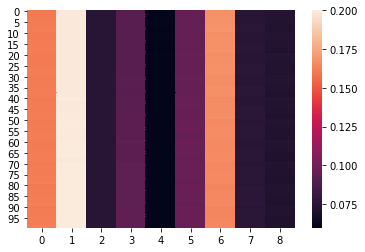

In [247]:
sns.heatmap(pd.DataFrame(q))

In [234]:
model.layers[1].get_weights()

[array([[ 2.10181907e-01, -1.32581532e-01, -1.94528952e-01,
         -1.82314068e-02, -8.29806775e-02, -1.87822804e-01,
         -1.56463131e-01,  7.89207965e-02,  2.98066139e-02,
         -4.75359857e-02, -4.48545665e-02,  1.10341117e-01,
         -2.01522559e-02,  1.52701363e-01, -2.03100249e-01,
          7.46147186e-02,  1.31571665e-01,  1.59540340e-01,
         -1.01790793e-01, -2.01611966e-01, -5.59811145e-02,
         -1.09039135e-01,  8.96605998e-02, -5.01792878e-02,
          1.26694694e-01, -8.11068714e-03,  2.02224538e-01,
          1.80847183e-01, -6.75739199e-02, -6.07817024e-02,
          1.11508623e-01, -8.06741416e-02,  1.22035280e-01,
         -1.08412847e-01,  1.35323778e-01, -3.21400315e-02,
          1.35621890e-01, -8.06419551e-02,  1.64054081e-01,
          5.47122508e-02, -3.72230560e-02,  1.01029769e-01,
         -1.07496366e-01, -2.35850811e-02, -1.17133319e-01,
          5.25189489e-02, -5.91448992e-02, -1.54227018e-04,
         -2.09370300e-01,  2.88886726e-0

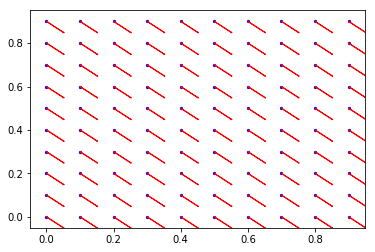

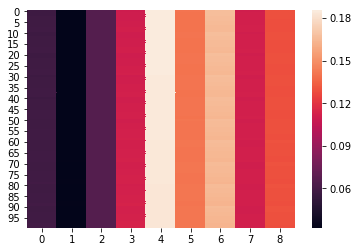

In [241]:
q = []

for x in x_p:
    for y in y_p:
        plt.scatter(x,y,s=5,color='b')
        status = np.array([x,y,.3,.3,.3,.3])
        q.append(model.predict(np.matrix(status))[0])
        dx,dy = pick_dql_action(status)
        plt.arrow(x,y,dx,dy,color='r')

plt.show()
sns.heatmap(pd.DataFrame(q))

In [243]:
np.argmax(model.predict(np.matrix(status))[0])

4